In [1]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 1.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
 

In [2]:
!pip install yfinance

In [3]:
from prophet import Prophet
import yfinance as yf

In [4]:
data=yf.download('BTC-USD',"2024-01-01","2024-06-07")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
...,...,...,...,...,...,...
2024-06-02,67710.273438,68409.164062,67315.523438,67751.601562,67751.601562,17110588415
2024-06-03,67753.898438,70230.820312,67589.835938,68804.781250,68804.781250,32401285324
2024-06-04,68804.570312,71047.406250,68564.640625,70567.765625,70567.765625,33149696545


In [5]:
df=data['Close']
df

Date
2024-01-01    44167.332031
2024-01-02    44957.968750
2024-01-03    42848.175781
2024-01-04    44179.921875
2024-01-05    44162.691406
                  ...     
2024-06-02    67751.601562
2024-06-03    68804.781250
2024-06-04    70567.765625
2024-06-05    71082.820312
2024-06-06    70757.164062
Name: Close, Length: 158, dtype: float64

In [6]:
df=df.reset_index()
df

,Date,Close
0,2024-01-01,44167.332031
1,2024-01-02,44957.968750
2,2024-01-03,42848.175781
3,2024-01-04,44179.921875
4,2024-01-05,44162.691406
...,...,...
153,2024-06-02,67751.601562
154,2024-06-03,68804.781250
155,2024-06-04,70567.765625
156,2024-06-05,71082.820312


In [7]:
df.columns=['ds','y']
df.head()

,ds,y
0,2024-01-01,44167.332031
1,2024-01-02,44957.968750
2,2024-01-03,42848.175781
3,2024-01-04,44179.921875
4,2024-01-05,44162.691406


In [8]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc72khkp/olocfgal.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc72khkp/j2v_5fpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71983', 'data', 'file=/tmp/tmpqc72khkp/olocfgal.json', 'init=/tmp/tmpqc72khkp/j2v_5fpi.json', 'output', 'file=/tmp/tmpqc72khkp/prophet_modelbdp287i1/prophet_model-20240611162255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
coin_tahmin=model.make_future_dataframe(360)
tahmin=model.predict(coin_tahmin)
tahmin.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
513,2025-05-28,137867.970500,-76955.113343,350140.633842,-76512.499428,349325.392279,185.116364,185.116364,185.116364,185.116364,185.116364,185.116364,0.0,0.0,0.0,138053.086864
514,2025-05-29,138059.560031,-77742.844000,353446.958233,-77623.531800,350442.712773,129.250362,129.250362,129.250362,129.250362,129.250362,129.250362,0.0,0.0,0.0,138188.810393
515,2025-05-30,138251.149561,-78649.728483,353074.436610,-78801.629706,351566.094230,-197.169397,-197.169397,-197.169397,-197.169397,-197.169397,-197.169397,0.0,0.0,0.0,138053.980165
516,2025-05-31,138442.739092,-81244.588163,352812.024950,-79662.032184,352689.475688,-507.455850,-507.455850,-507.455850,-507.455850,-507.455850,-507.455850,0.0,0.0,0.0,137935.283242
517,2025-06-01,138634.328623,-81085.483139,353149.273550,-80522.434662,353805.581025,-195.614914,-195.614914,-195.614914,-195.614914,-195.614914,-195.614914,0.0,0.0,0.0,138438.713709


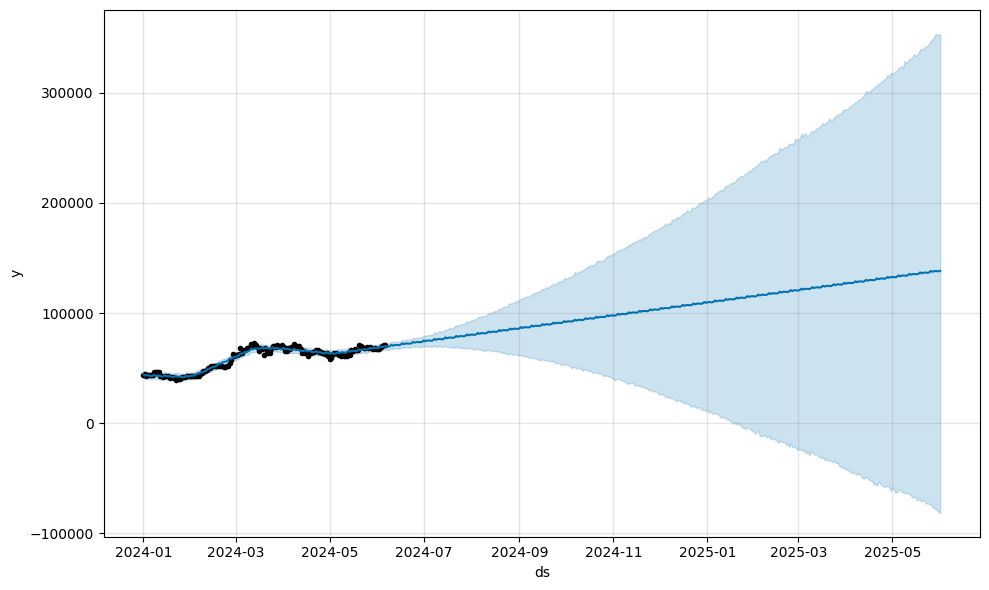

In [10]:
model.plot(tahmin);

##siyahlar gerçek bitcoin fiyatı mavi noktalar geçmiş bitcoin tahmin değerleri açık mavi kısım hatapayı

In [24]:
data_2=yf.download('AAPL',"2024-01-01","2024-06-07")
data_2.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.152283,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.765945,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.432098,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.703995,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.072495,59144500


In [25]:
df_2=data_2['Adj Close']
df_2.reset_index()
df_2

Date
2024-01-02    185.152283
2024-01-03    183.765945
2024-01-04    181.432098
2024-01-05    180.703995
2024-01-08    185.072495
                 ...    
2024-05-31    192.250000
2024-06-03    194.029999
2024-06-04    194.350006
2024-06-05    195.869995
2024-06-06    194.479996
Name: Adj Close, Length: 109, dtype: float64

In [26]:
df_2.columns=['ds','y']

In [33]:
df_2 = data_2.reset_index()

In [35]:
df_2.rename(columns={df_2.columns[0]: 'ds', df_2.columns[1]: 'y'}, inplace=True)



In [36]:
model = Prophet()
model.fit(df_2)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc72khkp/_96_4m04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqc72khkp/8ofmzbn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65515', 'data', 'file=/tmp/tmpqc72khkp/_96_4m04.json', 'init=/tmp/tmpqc72khkp/8ofmzbn_.json', 'output', 'file=/tmp/tmpqc72khkp/prophet_modelqskpqr1x/prophet_model-20240611164138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
aapl_tahmin = model.make_future_dataframe(360)
tahmin_2 = model.predict(aapl_tahmin)
tahmin_2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2025-05-28,414.306149,233.295129,600.865458,235.548426,602.766738,-0.904705,-0.904705,-0.904705,-0.904705,-0.904705,-0.904705,0.0,0.0,0.0,413.401444
465,2025-05-29,414.913103,233.948178,604.244291,235.487529,604.208241,-0.668917,-0.668917,-0.668917,-0.668917,-0.668917,-0.668917,0.0,0.0,0.0,414.244186
466,2025-05-30,415.520056,235.697066,607.088102,235.451407,605.718264,-0.376541,-0.376541,-0.376541,-0.376541,-0.376541,-0.376541,0.0,0.0,0.0,415.143516
467,2025-05-31,416.127010,236.526264,608.476317,235.468341,607.292963,1.221015,1.221015,1.221015,1.221015,1.221015,1.221015,0.0,0.0,0.0,417.348025
468,2025-06-01,416.733963,235.679000,611.338157,235.406005,608.906936,1.221016,1.221016,1.221016,1.221016,1.221016,1.221016,0.0,0.0,0.0,417.954979


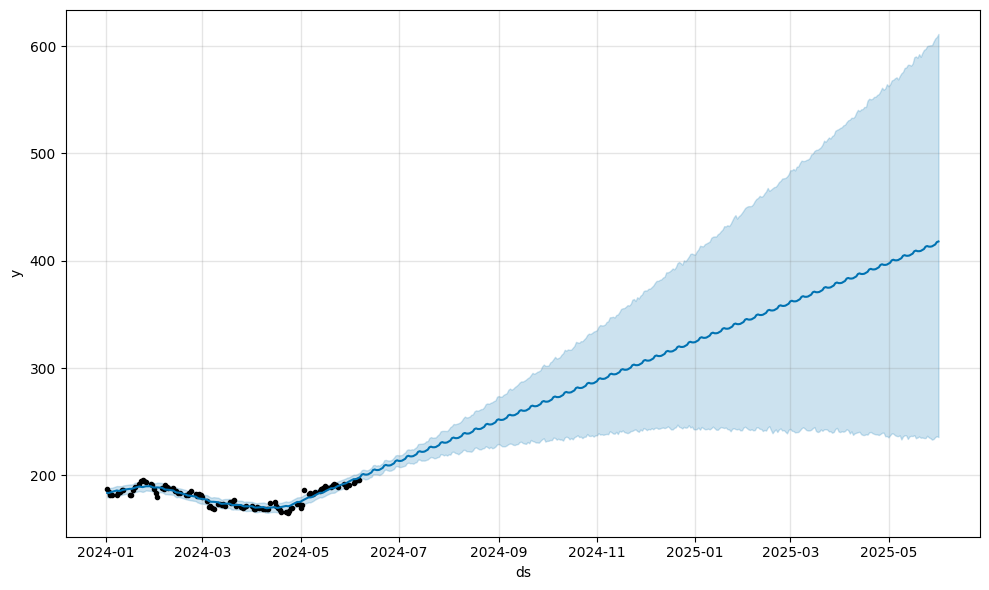

In [39]:
model.plot(tahmin_2);